# Logistic_Reggresion

Importing Library as follows

In [1]:
import pandas as pd
import numpy as np

Importing dataset form local host and get dummy variables

In [2]:
Default = pd.read_csv("D:/Statistics (Python)/Datasets/Default.csv")
dum_Default = pd.get_dummies(Default, drop_first=True)

*** Considering only Student variable***

X=pd.DataFrame(dum_Default['student_Yes'])

In [5]:
X = dum_Default.iloc[:,[0,1,3]]
y = dum_Default.iloc[:,2]

 Import the necessary modules

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

 Create training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    random_state=42)

Create the classifier: logreg

In [9]:
logreg = LogisticRegression()

Fit the classifier to the training data

In [10]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict the labels of the test set: y_pred

In [11]:
y_pred = logreg.predict(X_test)

 Compute and print the confusion matrix and classification report

In [12]:
print(confusion_matrix(y_test, y_pred))

[[3862    3]
 [ 135    0]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3865
           1       0.00      0.00      0.00       135

    accuracy                           0.97      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.93      0.97      0.95      4000



In [14]:
print(accuracy_score(y_test,y_pred))

0.9655


***ROC***

 Import necessary modules

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

 Compute predicted probabilities: y_pred_prob

In [16]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

 Generate ROC curve values: fpr, tpr, thresholds

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

 Plot ROC curve

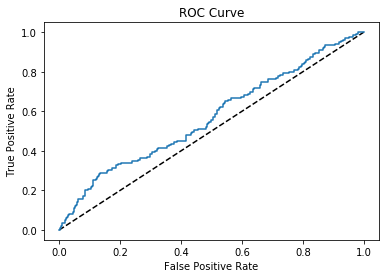

In [19]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [20]:
roc_auc_score(y_test, y_pred_prob)

0.5686857361889703

 Tuning Logistic with C 

In [22]:
from sklearn.model_selection import GridSearchCV
c_space = np.array([0.01,0.1,0.25,0.3,0.5,0.6,0.7,0.9,1,1.1,1.2,1.5])
param_grid = {'C': c_space}

logreg = LogisticRegression(penalty='l2')

 Instantiate the GridSearchCV object: logreg_cv

In [23]:
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

 Fit it to the data

In [24]:
logreg_cv.fit(X,y)

print(logreg_cv.cv_results_ )

{'mean_fit_time': array([0.08332858, 0.08534708, 0.08927965, 0.07663593, 0.07340193,
       0.0822516 , 0.09364514, 0.08952436, 0.07570372, 0.07941313,
       0.08295693, 0.08332043]), 'std_fit_time': array([0.01731764, 0.02368931, 0.01704805, 0.01285214, 0.01393461,
       0.01343148, 0.02723626, 0.01365995, 0.01819289, 0.01198088,
       0.00906715, 0.0102167 ]), 'mean_score_time': array([0.0006043 , 0.00672812, 0.00052862, 0.00627337, 0.        ,
       0.00354843, 0.00547161, 0.00110321, 0.003124  , 0.00019941,
       0.00045156, 0.        ]), 'std_score_time': array([0.00120859, 0.00824085, 0.00105724, 0.00768329, 0.        ,
       0.00660939, 0.00163561, 0.00097507, 0.006248  , 0.00039883,
       0.00090313, 0.        ]), 'param_C': masked_array(data=[0.01, 0.1, 0.25, 0.3, 0.5, 0.6, 0.7, 0.9, 1.0, 1.1,
                   1.2, 1.5],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
   

In [25]:
print(logreg_cv.best_score_)

0.97


In [26]:
print(logreg_cv.best_params_)

{'C': 0.7}
